In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, GridSearchCV 
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
import time
from sklearn.preprocessing import scale

In [2]:
#get the data
traindata = pd.read_csv("adult.data",names=['age','workclass','fnlwgt','education',' education-num',
'marital_status','occupation','relationship','race','sex',
'capital-gain','capital-loss','hours-per-week','native_country','income'])
testdata = pd.read_csv("adult.test",names=['age','workclass','fnlwgt','education',' education-num',
'marital_status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native_country','income'],skiprows=1)

In [3]:
start_time = time.time() # start time

In [4]:
#delete the column which contains Nan
traindata = traindata.replace(' ?', np.nan).dropna()
testdata = testdata.replace(' ?', np.nan).dropna()

In [5]:
#replace the income of testdata
testdata['income'] = testdata.income.replace({' <=50K.': ' <=50K', ' >50K.': ' >50K'})

In [6]:
for feature in traindata.columns: # Loop through all columns in the dataframe
    if traindata[feature].dtype == 'object': # Only apply for columns with categorical strings
        traindata[feature] = pd.Categorical(traindata[feature]).codes # Replace strings with an integer
for feature in testdata.columns: # Loop through all columns in the dataframe
    if testdata[feature].dtype == 'object': # Only apply for columns with categorical strings
        testdata[feature] = pd.Categorical(testdata[feature]).codes # Replace strings with an integer

In [7]:
# reindex the dataframe
newindex = range(len(traindata))
traindata['c'] = newindex
traindata = traindata.set_index('c')

In [8]:
#split label and data
trainlabel = traindata.pop('income')
testlablel = testdata.pop('income')

In [9]:
#standardizing the data
traindata = scale(traindata)
testdata = scale (testdata)

/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':
/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by the scale function.
  from ipykernel import kernelapp as app


In [10]:
kf = KFold(n_splits=10,shuffle=False) #10 fold
accuracy = []
cfmatrix = []
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8,'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 
creport = []
for train,test in kf.split(traindata):
    Train_Set = traindata[train]
    TrainLabel = (trainlabel[train])
    Test_Set = traindata[test]
    TestLabel = trainlabel[test]
    traindmat = xgb.DMatrix(Train_Set,TrainLabel)
    testdmat = xgb.DMatrix(Test_Set)
    final_gb = xgb.train(our_params, traindmat) #train xgboost
    y_pred = final_gb.predict(testdmat) # Predict using testdmat
    predict_label = [round(value) for value in y_pred]
    test_accuracy = accuracy_score(TestLabel, predict_label) #accuracy 
    accuracy.append(test_accuracy) 
    cr = classification_report(TestLabel, predict_label) # presion recall and f1 score
    cm = confusion_matrix(TestLabel, predict_label) #confusion matrix
    cfmatrix.append(cm)
    creport.append(cr)

[19:49:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:31] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

[19:49:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:49:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:49:33] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_

In [11]:
print("--- %s seconds ---" % (time.time() - start_time)) #run time 
#print the result
for i in range(0,10):
    print(creport[i],cfmatrix[i])
    print(accuracy[i])

--- 3.2006592750549316 seconds ---
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2236
           1       0.75      0.50      0.60       781

   micro avg       0.83      0.83      0.83      3017
   macro avg       0.79      0.72      0.74      3017
weighted avg       0.82      0.83      0.81      3017
 [[2103  133]
 [ 390  391]]
0.8266489890619821
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      2289
           1       0.76      0.47      0.58       728

   micro avg       0.84      0.84      0.84      3017
   macro avg       0.80      0.71      0.74      3017
weighted avg       0.83      0.84      0.82      3017
 [[2179  110]
 [ 385  343]]
0.8359297315213788
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2309
           1       0.76      0.54      0.63       707

   micro avg       0.85      0.85      0.85      3016
 

In [12]:
Test_Set = xgb.DMatrix(testdata)  #load data into dmatrix
y_pred = final_gb.predict(Test_Set) # Predict using testdmat
predict_test = [round(value) for value in y_pred] #predict label
cm = confusion_matrix(testlablel, predict_test) #confusion matrix
print (classification_report(testlablel, predict_test))
print('accuracy:',accuracy_score(testlablel, predict_test))
print(cm)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     11360
           1       0.77      0.51      0.61      3700

   micro avg       0.84      0.84      0.84     15060
   macro avg       0.81      0.73      0.76     15060
weighted avg       0.83      0.84      0.83     15060

accuracy: 0.8419654714475432
[[10787   573]
 [ 1807  1893]]


{'f7': 18, 'f4': 9, 'f10': 18, 'f2': 3, 'f3': 3, 'f11': 4, 'f0': 9, 'f12': 2, 'f5': 3}
{'age': 9, 'fnlwgt': 3, 'education': 3, ' education-num': 9, 'marital_status': 3, 'relationship': 18, 'capital-gain': 18, 'capital-loss': 4, 'hours-per-week': 2}
relationship      18
capital-gain      18
age                9
 education-num     9
capital-loss       4
marital_status     3
fnlwgt             3
education          3
hours-per-week     2
dtype: int64


Text(0,0.5,'Feature Importance Score')

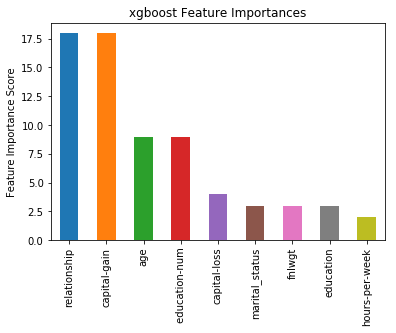

In [13]:
#print the feature importance
score = final_gb.get_fscore()
score.update({'age':score.pop("f0"),'fnlwgt':score.pop("f2"),'education':score.pop("f3"),' education-num':score.pop("f4"),
'marital_status':score.pop("f5"),'relationship':score.pop("f7"),
'capital-gain':score.pop("f10"),'capital-loss':score.pop("f11"),'hours-per-week':score.pop("f12")})
feat_imp = pd.Series(score).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='xgboost Feature Importances')
plt.ylabel('Feature Importance Score')

AUC Score : 0.913528


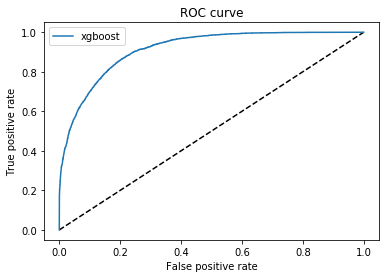

In [14]:
#calculate the auc score and draw the roc curve
xgmodel = XGBClassifier(**our_params)
xgmodel.fit(traindata, trainlabel)
y_pred_rf = xgmodel.predict_proba(testdata)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(testlablel, y_pred_rf)
print("AUC Score : %f" %roc_auc_score(testlablel, y_pred_rf))
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='xgboost')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()